# Baseball Statistics: Salaries

Baseball is a game full of statistics, and most of those statistics have been consistently and carefully tracked going back to the late 1800s. That makes professional baseball a playground for data analysts. Here I look at interesting correlations between players, their stats, and their salaries.

**Data Source:** [Lahman's Baseball Database](http://www.seanlahman.com/baseball-archive/statistics/). The data set I used was through the 2018 season.

Copyright © 2019 Ken Norton (ken@kennethnorton.com)

In [15]:
%run ./1_Data_Preparation.ipynb
plt.style.use(['default', 'fivethirtyeight', 'seaborn-poster'])

I want to use inflation-adjusted salary figures, so I obtained CPI data from the Bureau of Labor Statistics. Salary data only goes back to 1985, so I got annual figures for 1985-2018.

In [16]:
salaries.head()

,yearID,teamID,lgID,playerID,salary
0,1985,ATL,NL,barkele01,870000
1,1985,ATL,NL,bedrost01,550000
2,1985,ATL,NL,benedbr01,545000
3,1985,ATL,NL,campri01,633333
4,1985,ATL,NL,ceronri01,625000


In [17]:
inflation = pd.read_csv('data/CPI.csv')

In [18]:
inflation.head()

,Year,CPI
0,1985,107.6
1,1986,109.6
2,1987,113.6
3,1988,118.3
4,1989,124.0


In [19]:
# Add a CPI Multiplier column based on the last row in the CPI dataframe, 2018.
# Technique from here: https://towardsdatascience.com/adjusting-prices-for-inflation-in-pandas-daaaa782cd89
inflation['CPI_Multiplier'] = inflation['CPI'].iloc[-1] / inflation['CPI']

In [20]:
inflation.tail()

,Year,CPI,CPI_Multiplier
29,2014,236.736,1.060705
30,2015,237.017,1.059447
31,2016,240.007,1.046249
32,2017,245.120,1.024425
33,2018,251.107,1.000000


In [21]:
inflation[inflation['Year'] == 2006]['CPI']

21    201.6
Name: CPI, dtype: float64

In [22]:
salaries = pd.merge(salaries, inflation, how='left', left_on='yearID', right_on='Year')

In [23]:
salaries.head()

,yearID,teamID,lgID,playerID,salary,Year,CPI,CPI_Multiplier
0,1985,ATL,NL,barkele01,870000,1985,107.6,2.333708
1,1985,ATL,NL,bedrost01,550000,1985,107.6,2.333708
2,1985,ATL,NL,benedbr01,545000,1985,107.6,2.333708
3,1985,ATL,NL,campri01,633333,1985,107.6,2.333708
4,1985,ATL,NL,ceronri01,625000,1985,107.6,2.333708


In [24]:
salaries.tail()

,yearID,teamID,lgID,playerID,salary,Year,CPI,CPI_Multiplier
26423,2016,WAS,NL,strasst01,10400000,2016,240.007,1.046249
26424,2016,WAS,NL,taylomi02,524000,2016,240.007,1.046249
26425,2016,WAS,NL,treinbl01,524900,2016,240.007,1.046249
26426,2016,WAS,NL,werthja01,21733615,2016,240.007,1.046249
26427,2016,WAS,NL,zimmery01,14000000,2016,240.007,1.046249


In [25]:
salaries['salary_2018$'] = salaries['salary'] * salaries['CPI_Multiplier']

In [26]:
salaries.head()

,yearID,teamID,lgID,playerID,salary,Year,CPI,CPI_Multiplier,salary_2018$
0,1985,ATL,NL,barkele01,870000,1985,107.6,2.333708,2.030326e+06
1,1985,ATL,NL,bedrost01,550000,1985,107.6,2.333708,1.283539e+06
2,1985,ATL,NL,benedbr01,545000,1985,107.6,2.333708,1.271871e+06
3,1985,ATL,NL,campri01,633333,1985,107.6,2.333708,1.478014e+06
4,1985,ATL,NL,ceronri01,625000,1985,107.6,2.333708,1.458568e+06


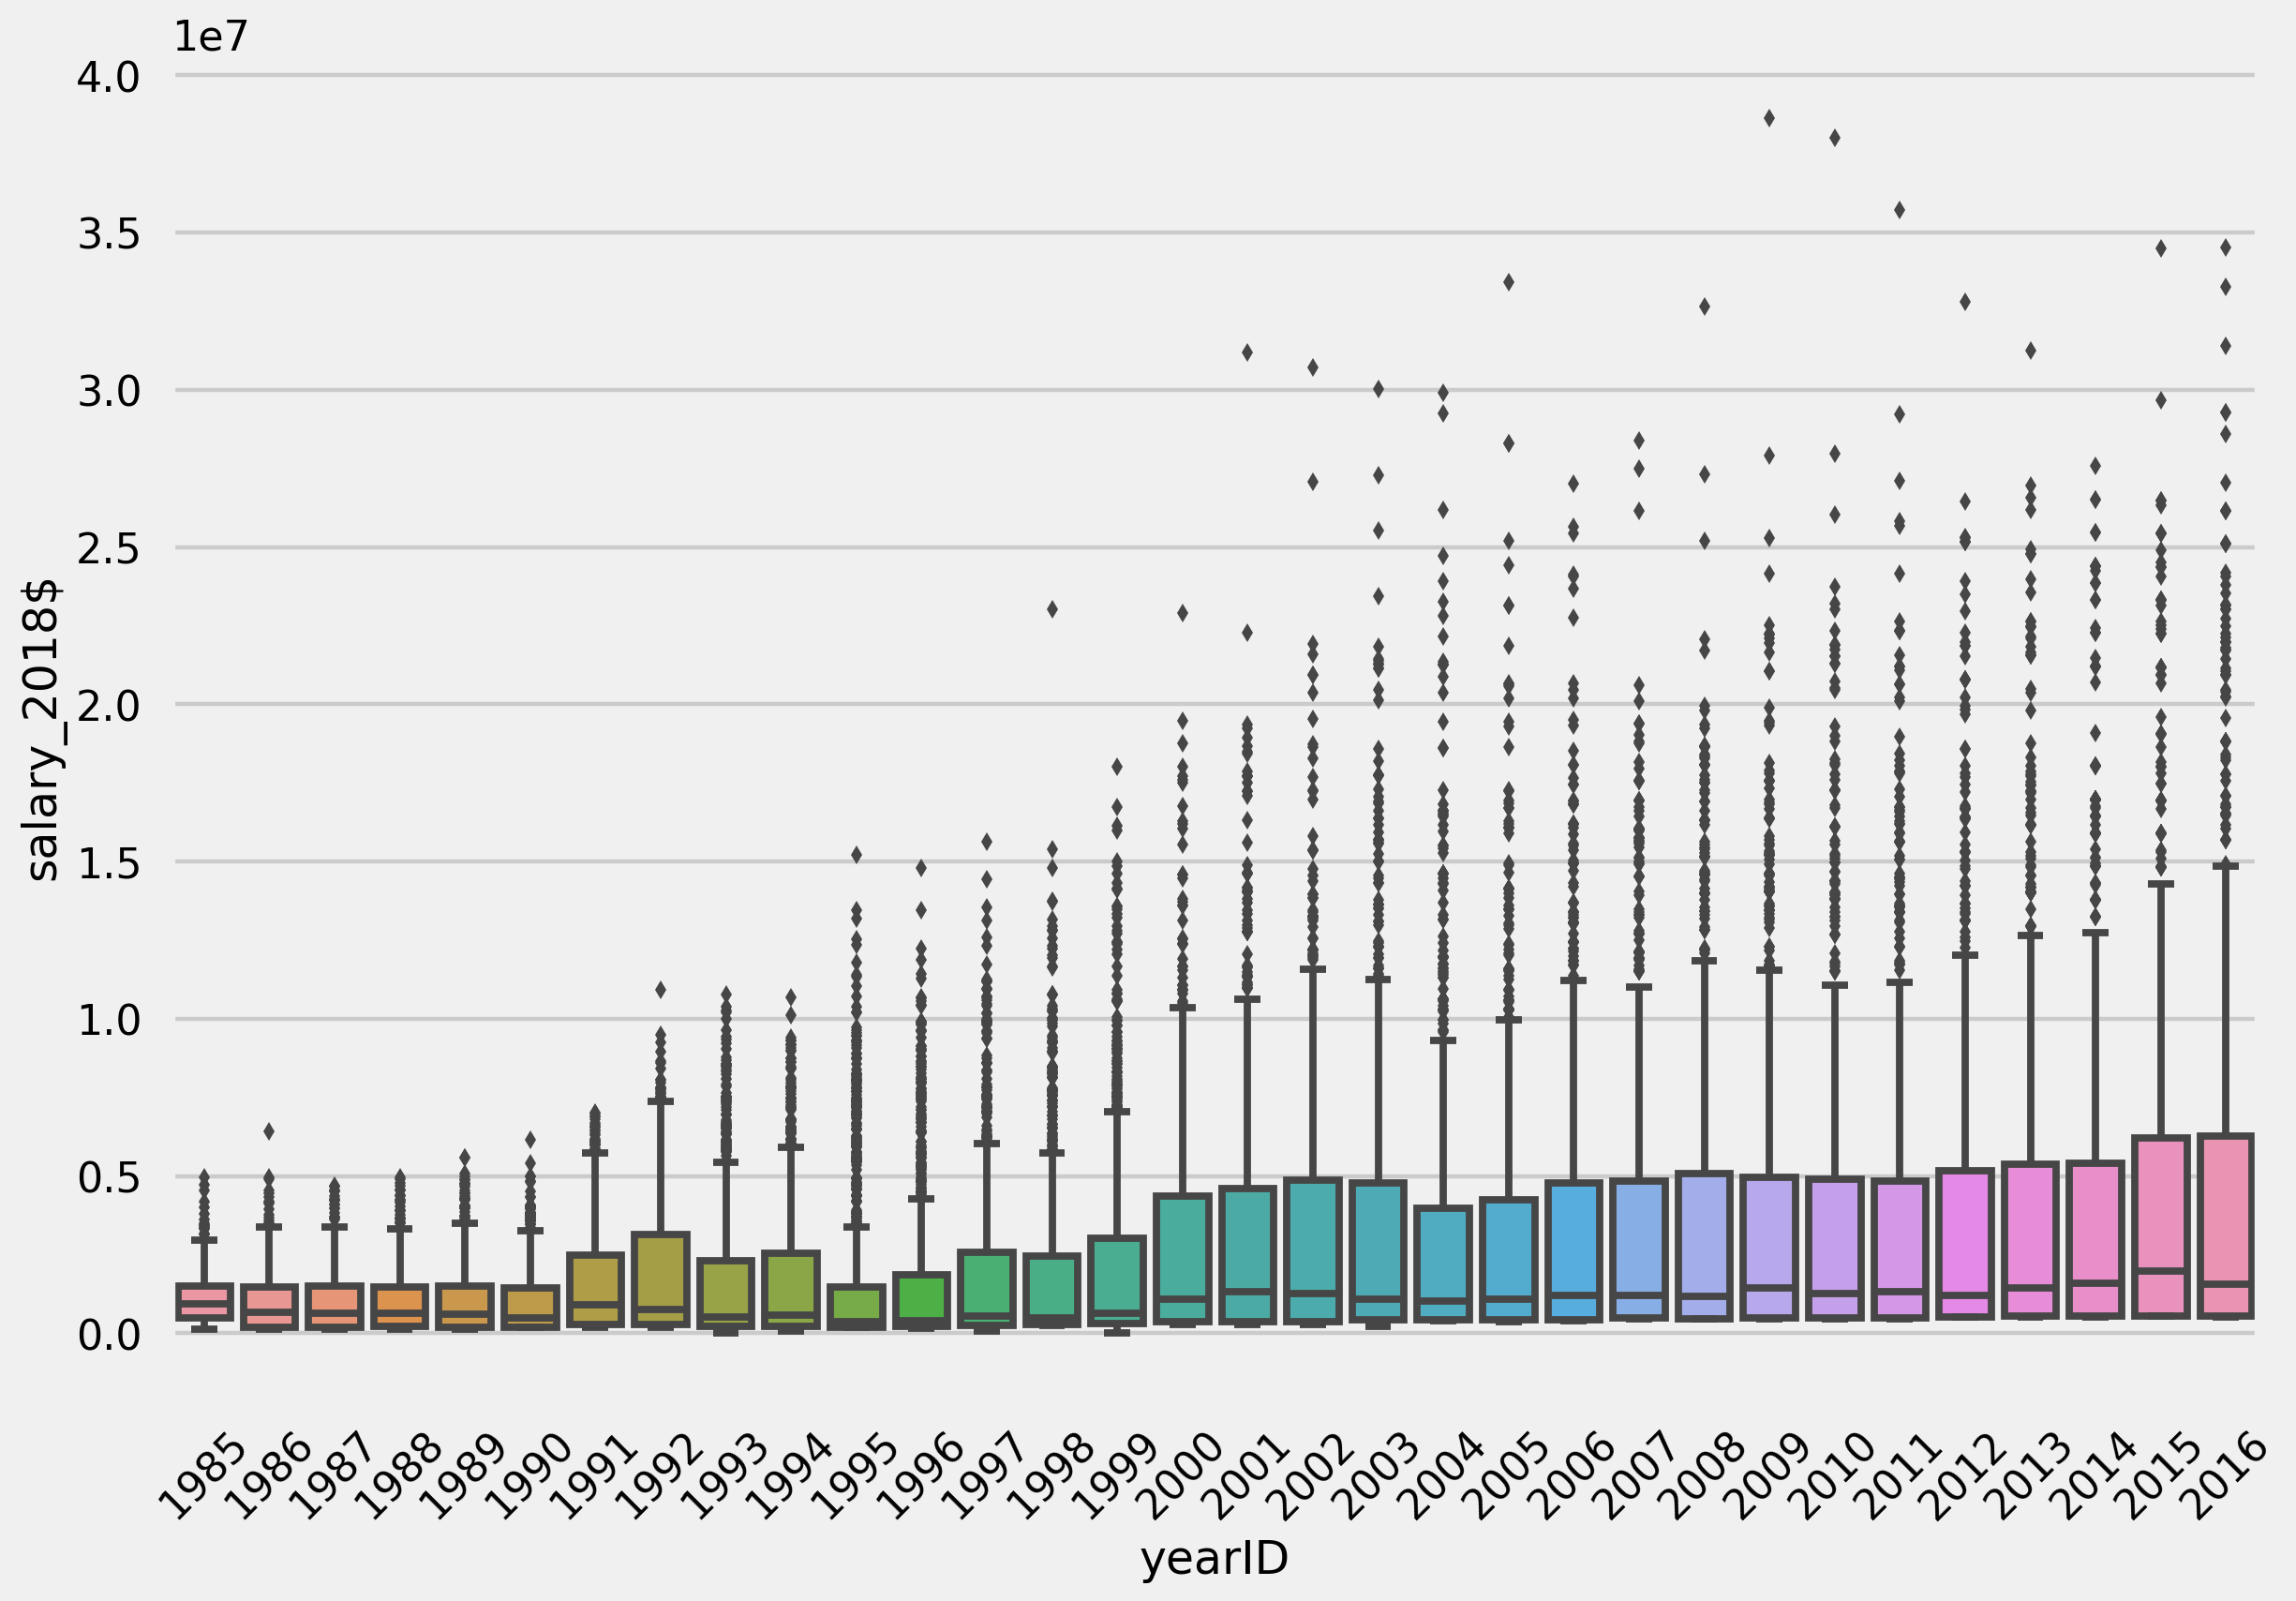

In [31]:
ax = sns.boxplot(x='yearID', y='salary_2018$', data=salaries)
plt.setp(ax.get_xticklabels(), rotation=45)
plt.show()

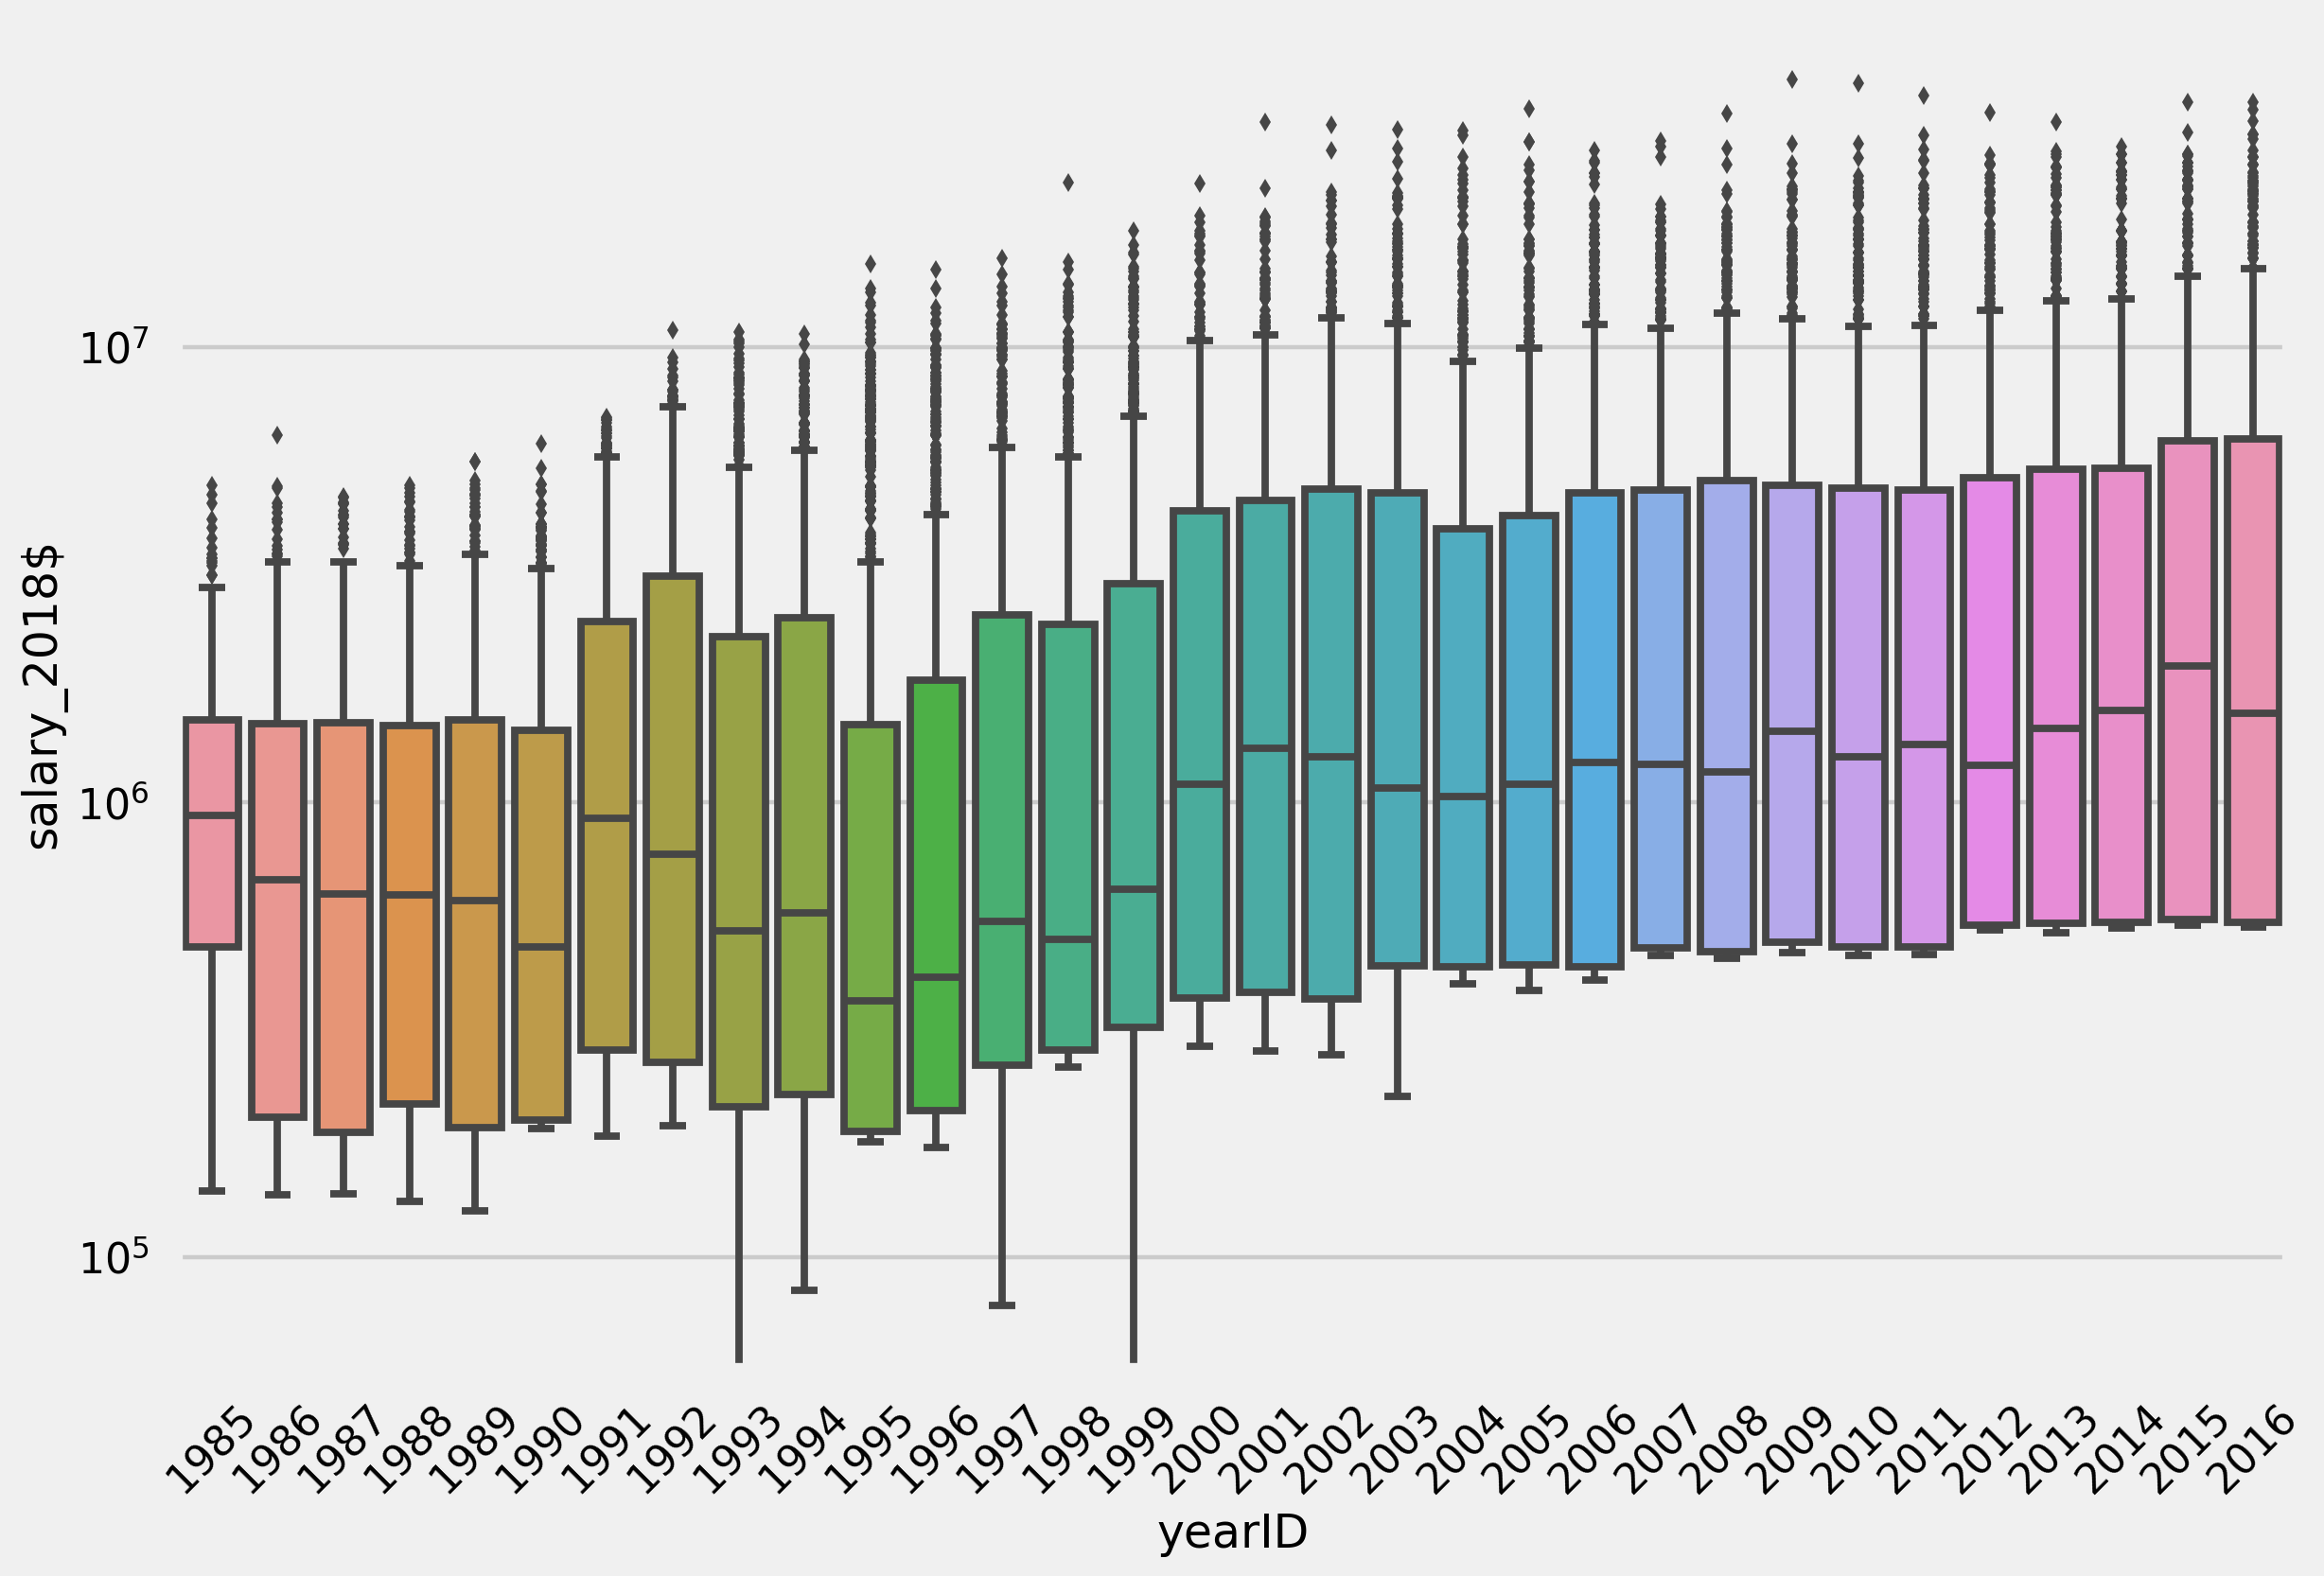

In [32]:
ax = sns.boxplot(x='yearID', y='salary_2018$', data=salaries)
plt.setp(ax.get_xticklabels(), rotation=45)
ax.set_yscale('log')
plt.show()